In [11]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

# Phasor

In [23]:
# parameter setting
amp = 1          # range [0.0, 1.0]
# # 진폭은 소리의 크기를 결정함.진폭과 주파수는 독립적.
sr = 10000       # sampling rate, Hz
# 1초에 숫자가 몇 개? 아날로그를 디지털로 변환할 때, 얼마나 잘게 쪼개는가.
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
# wave가 1초에 반복되는 횟수(사이클). 음의 높낮이와 관련있음. 
# sampling rate와 frequency는 같은 Hz 단위를 쓰지만 다른 개념.

#### 모든 sound는 단순한 sign wave의 합

In [24]:
# generate time
t = np.arange(1, sr * dur+1)/sr


In [25]:
# sin 함수는 시간이 아니라 각도를 인풋으로 받음. 
# degree가 아니라 radian 형태의 각도를 받음. 파이=180도.
# 물리적 세계에서는 시간 개념이 필요. x축에 시간이 있어야 실제 소리를 만들 수 있음.
t=np.arange(1,sr) #1부터 sampling rate 미만까지 숫자를 만들어라.
print(t, len(t))
t=np.arange(1,sr+1) #arrange는 마지막 숫자는 포함하지 않기 때문에 1을 더해줌.
print(t, len(t))
t=np.arange(1,sr+1)/sr #만분의 1초부터 만분의 만까지의 숫자를 만듦. 
print(t, len(t))
t = np.arange(1, sr * dur+1)/sr #dur에 해당하는 시간 동안 
print(t, len(t))
# duration을 0초에서 0.5까지 설정할 경우, 만분의 일~만분의 오천.

[   1    2    3 ..., 9997 9998 9999] 9999
[    1     2     3 ...,  9998  9999 10000] 10000
[  1.00000000e-04   2.00000000e-04   3.00000000e-04 ...,   9.99800000e-01
   9.99900000e-01   1.00000000e+00] 10000
[  1.00000000e-04   2.00000000e-04   3.00000000e-04 ...,   4.99800000e-01
   4.99900000e-01   5.00000000e-01] 5000


In [26]:
# generate phase
theta = t * 2*np.pi * freq   

In [27]:
# 시간 자체가 각도가 될 수는 없음. 
theta=t*2*np.pi
print(theta,len(theta))
# 위에서 만든 time에 2파이를 곱함. 넘피 안의 파이를 사용. 
# 0부터 2파이까지가 sr*dur만큼 쪼개짐. 
theta = t * 2*np.pi * freq
print(theta,len(theta))
# frequency를 곱한다면, 끝나는 지점이 2파이*freq. 1초동안 freq만큼 반복. 

[  6.28318531e-04   1.25663706e-03   1.88495559e-03 ...,   3.14033602e+00
   3.14096434e+00   3.14159265e+00] 5000
[  6.28318531e-02   1.25663706e-01   1.88495559e-01 ...,   3.14033602e+02
   3.14096434e+02   3.14159265e+02] 5000


In [6]:
# generate signal by cosine-phasor
s = np.sin(theta)
# theta는 radian값으로 convert한 것 -> sin 인풋으로 들어갈 수 있음. 
# theta와 t,s의 길이는 같음.

<IPython.core.display.Javascript object>


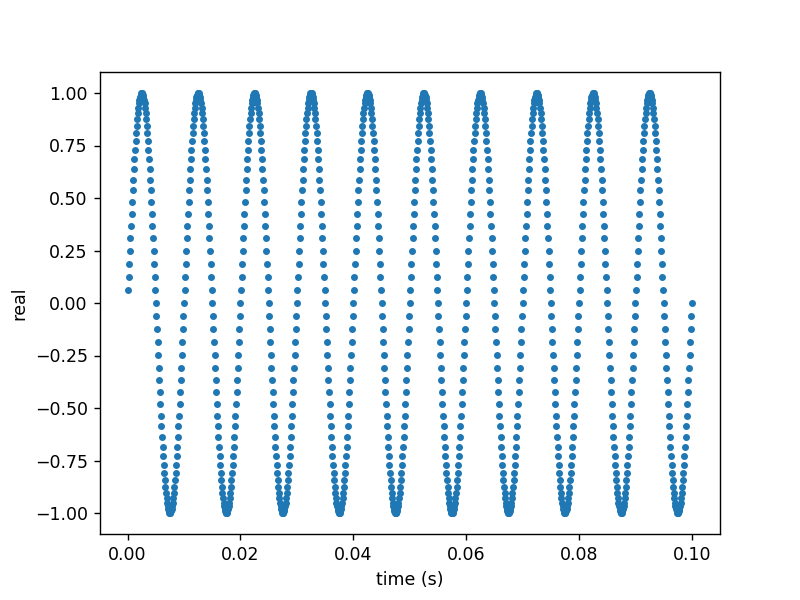

In [28]:
#ploting
fig = plt.figure()
ax = fig.add_subplot(111) #axis
ax.plot(t[0:1000], s[0:1000], '.')
# plot에는 theta가 인풋에 들어가지 않음. 
# x축이 time, y축이 sin값. 범위를 따로 설정하지 않으면, 총 10000(sr)개의 점이 찍힘. 
ax.set_xlabel('time (s)')
ax.set_ylabel('real')


In [31]:
amp=3
sr=10000
dur=2
freq=200

<IPython.core.display.Javascript object>


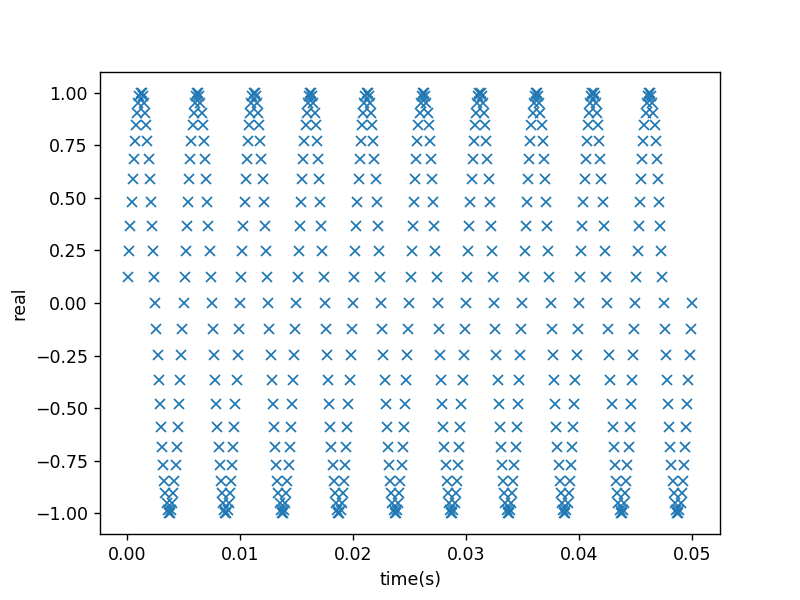

In [39]:
t=np.arange(1,sr*dur+1)/sr
theta=t*2*np.pi*freq
s=np.sin(theta)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(t[:500],s[:500],'x')
ax.set_xlabel('time(s)')
ax.set_ylabel('real')

In [8]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

<IPython.core.display.Javascript object>


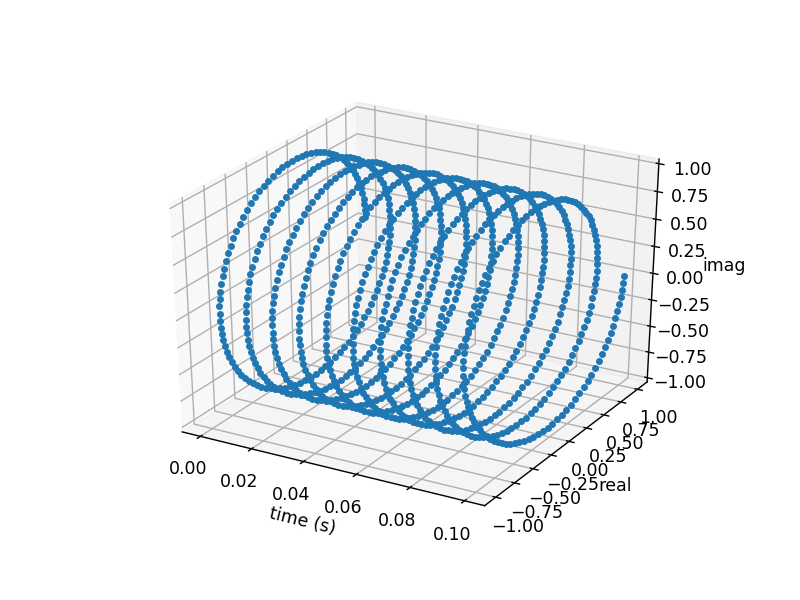

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [10]:
ipd.Audio(s, rate=sr)
# sound play 

# Generate pulse train

<IPython.core.display.Javascript object>


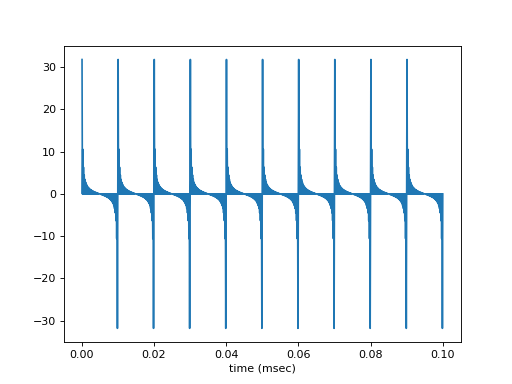

In [125]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

In [79]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [126]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [127]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [128]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [129]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [130]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [131]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# load wav

In [132]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# Fourier tranform

In [133]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

<IPython.core.display.Javascript object>


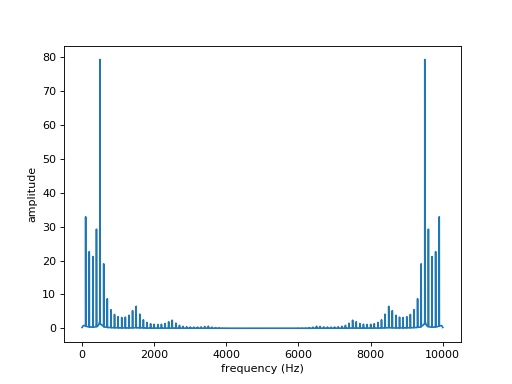

Text(0, 0.5, 'amplitude')

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# define helper functions

In [100]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [101]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2140e358>)

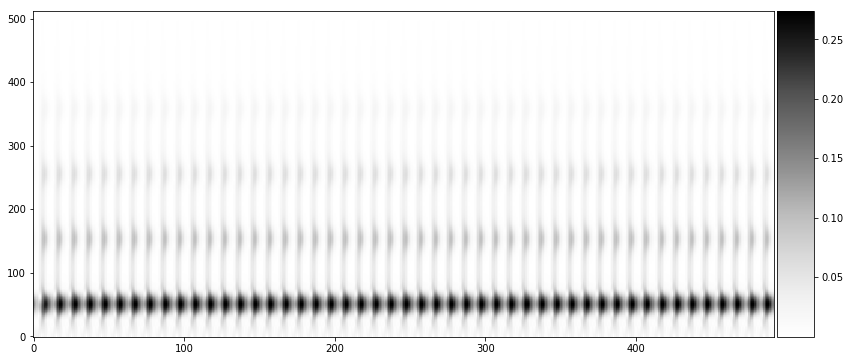

In [102]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

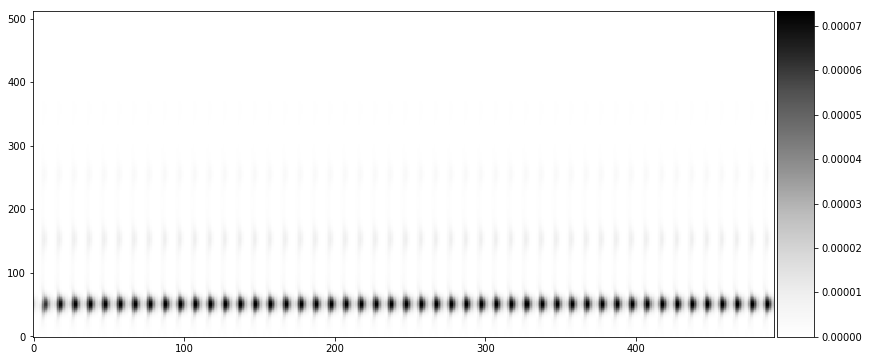

In [103]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

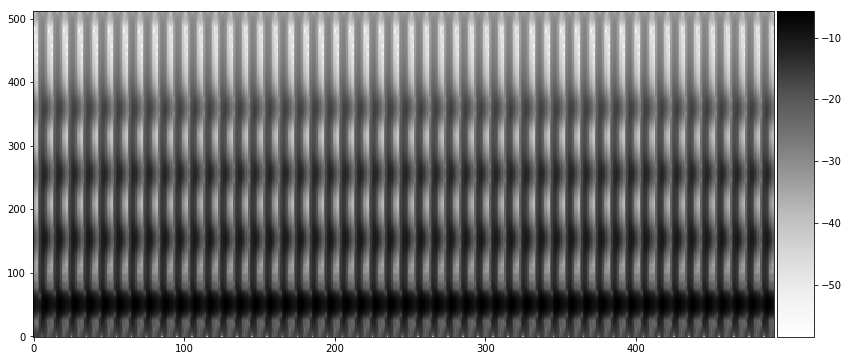

In [104]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

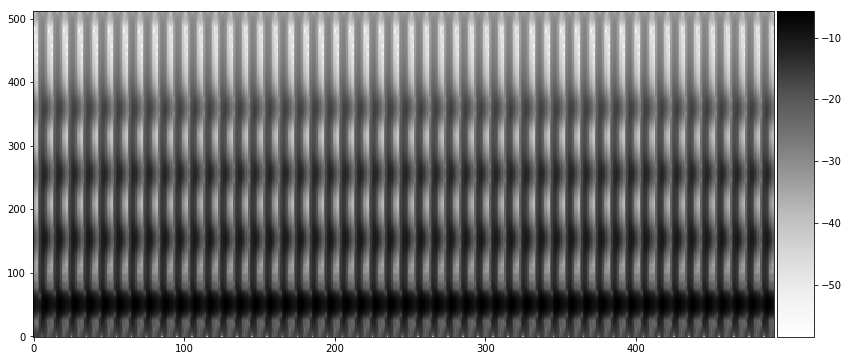

In [105]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);